In [2]:
!pip install lasio
%pip install -r optional-packages.txt
!pip install --upgrade lasio

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'optional-packages.txt'


In [3]:
%pip install -r optional-packages.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'optional-packages.txt'


In [31]:
import pandas as pd
import numpy as np
import lasio
import matplotlib.pyplot as plt
las = lasio.read(r'1050383876.las')

In [2]:
#header of the las file has log information that can be obtained using lasio library
las.curves

[CurveItem(mnemonic="DEPT", unit="FT", value="0 000 00 00", descr="Depth", original_mnemonic="DEPT", data.shape=(7056,)),
 CurveItem(mnemonic="CNPOR", unit="PU", value="0", descr="CN Selected Porosity", original_mnemonic="CNPOR", data.shape=(7056,)),
 CurveItem(mnemonic="DCAL", unit="IN", value="0", descr="Caliper from Density Tool", original_mnemonic="DCAL", data.shape=(7056,)),
 CurveItem(mnemonic="DPOR", unit="PU", value="0", descr="Density Porosity", original_mnemonic="DPOR", data.shape=(7056,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="0", descr="Gamma Ray", original_mnemonic="GR", data.shape=(7056,)),
 CurveItem(mnemonic="RHOB", unit="G/CC", value="0", descr="Bulk Density", original_mnemonic="RHOB", data.shape=(7056,)),
 CurveItem(mnemonic="RHOC", unit="G/CC", value="0", descr="Density Correction", original_mnemonic="RHOC", data.shape=(7056,)),
 CurveItem(mnemonic="RILD", unit="OHM-M", value="0", descr="DIL Deep Resistivity", original_mnemonic="RILD", data.shape=(7056,)),
 C

In [3]:
df = las.df() 

In [4]:
#for better visualization
df.head()

,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
DEPT,,,,,,,,,,,,,,,,,
6.0,NaN,NaN,NaN,23.8362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.5,NaN,NaN,NaN,28.8864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,33.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.5,NaN,NaN,NaN,34.6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,36.0153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(10)

,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
DEPT,,,,,,,,,,,,,,,,,
3529.0,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,7715.4507,264.7914,231.9387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3529.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1266.8292,260.4406,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.9396,182.0187,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3530.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.5699,46.4949,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.8126,20.3038,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3531.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0000,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3532.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM', 'RLL3',
       'RXORT', 'SP', 'MEL15', 'MEL20', 'DT', 'ITT', 'MELCAL', 'SPOR'],
      dtype='object')

In [17]:
df_selected = df[['CNPOR', 'GR', 'RHOB', 'DT']]

In [18]:
#Few pointers for understanding missing data in a LAS file
#1. When you open the LAS file, many rows are populated with printed value 
# of -999.2500; this indicates the null values
#2. Missing values are not common in the middle of the dataset, as the zone of 
# interest may vary


In [22]:
#number of NaN in each columns
df_selected.isna().sum(axis=0)

CNPOR    2064
GR         58
RHOB     2026
DT         51
dtype: int64

In [24]:
#Large chunk of CNPOR, RHOB, MELCAL are missing
#getting rid of these columns
df_dropped = df_selected.dropna(subset=['GR', 'DT'],axis=0, how='any')
#drop all rows that one (or more) of the subset logs (‘GR’, ‘DT’) has a null value

In [25]:
df_dropped.describe()

,CNPOR,GR,RHOB,DT
count,4992.000000,6962.000000,5010.000000,6962.000000
mean,19.184611,58.035839,2.494757,82.001241
std,7.939384,29.548550,0.207499,29.147369
min,-0.087500,5.712800,1.421800,36.290500
25%,13.698600,36.854175,2.441700,63.909100
50%,19.939850,54.724650,2.542100,74.307050
75%,24.594525,74.357100,2.617100,91.237475
max,45.596600,345.344000,2.978700,275.567300


In [20]:
df_dropped.isna().sum(axis=0)

CNPOR     1970
GR           0
RHOB      1952
DT           0
MELCAL    1952
SPOR         0
dtype: int64

In [26]:
#Filtering
df_filt1 = df_dropped.loc[(df_dropped.CNPOR > -15) & (df_dropped.CNPOR <= 50)]
df_filt2 = df_filt1.loc[(df_dropped.GR > 0) & (df_dropped.GR  <= 250)]
df_filt3 = df_filt2.loc[(df_dropped.RHOB> 1) & (df_dropped.RHOB<= 3)]
df_filt = df_filt3.loc[(df_dropped.DT > 30) & (df_dropped.DT <= 140)]

In [27]:
df_n = df_filt.copy()      
df_n['Vsh'] = (df_n.GR - df_n.GR.min()) / (df_n.GR.max() - df_n.GR.min())

In [29]:
df_n.head()

,CNPOR,GR,RHOB,DT,Vsh
DEPT,,,,,
1000.0,4.6246,10.8238,2.9297,51.7747,0.021039
1000.5,4.2887,11.3378,2.9385,51.9790,0.023155
1001.0,4.1375,11.7173,2.9348,52.0958,0.024717
1001.5,4.0279,13.0204,2.9106,52.1265,0.030081
1002.0,3.9369,12.7157,2.8825,52.0743,0.028827


In [30]:
df_idx = df_n.rename_axis('Depth').reset_index()
df_idx.head()

,Depth,CNPOR,GR,RHOB,DT,Vsh
0,1000.0,4.6246,10.8238,2.9297,51.7747,0.021039
1,1000.5,4.2887,11.3378,2.9385,51.9790,0.023155
2,1001.0,4.1375,11.7173,2.9348,52.0958,0.024717
3,1001.5,4.0279,13.0204,2.9106,52.1265,0.030081
4,1002.0,3.9369,12.7157,2.8825,52.0743,0.028827


In [40]:
def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.GR, logs.Depth, color='green')
    ax[1].plot(logs.CNPOR, logs.Depth, color='red')
    ax[2].plot(logs.DT, logs.Depth, color='black')
    ax[3].plot(logs.RHOB, logs.Depth, color='c')
    ax[4].plot(logs.Vsh, logs.Depth, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("CNPOR")
    ax[1].set_xlim(logs.CNPOR.min(),logs.CNPOR.max())
    ax[2].set_xlabel("DT")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("Vsh")
    ax[4].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]) 
    
    f.suptitle('WELL#', fontsize=14,y=0.94)

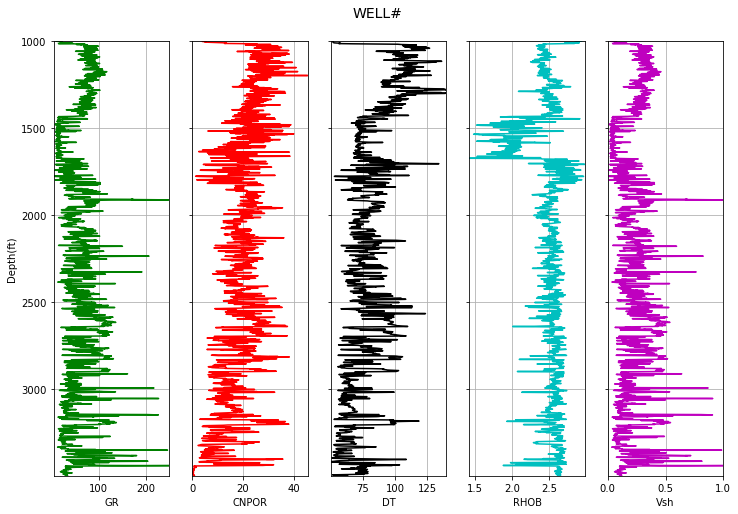

In [41]:
log_plot(df_idx)